# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing Libraries

In [194]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 -q --user

In [195]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from google.colab import drive

## Loading the Dataset

In [196]:
# Mount personal Google drive
root_dir = '/content/drive'
drive.mount(root_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
# Define the sub-directory where the data is located
drive_subdir = 'MyDrive/DataScienceCourse/SupervisedLearning/Project'

# Define the name of the CSV file containing the dataset
file_name = 'used_device_data.csv'

# Construct the full path to the datafile
file_path = os.path.join(root_dir, drive_subdir, file_name)

# Load the datafile into a dataframe
data = pd.read_csv(file_path)

## Data Overview

- Observations
- Sanity checks

In [198]:
# View the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [199]:
# View the last few rows of the dataset
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [200]:
# Get the shape of the dataframe
print(f'The dataframe has {data.shape[0]} rows and {data.shape[1]} columns')

The dataframe has 3454 rows and 15 columns


In [201]:
# Get information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [202]:
# Get a statistical summary of the dataframe (numeric)
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [203]:
# Get a statistical summary of the dataframe (categorical)
data.describe(include='object')

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


In [204]:
# Check for missing values
num_missing = data.isnull().sum().sum()
print(f'The dataframe has {num_missing} missing values')

The dataframe has 202 missing values


In [205]:
# Check for duplicate values
duplicate_rows = data.duplicated().sum()
print(f'The dataframe has {duplicate_rows} duplicate rows')

The dataframe has 0 duplicate rows


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Helpful Plotting Functions

In [206]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, units=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    if units is None:
      units = ''
    else:
      units = f' ({units})'

    fig, (ax_hist, ax_box) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.7, 0.3)},
        figsize=figsize
        )

    if bins:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          bins=bins
          )
    else:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          )

    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="yellow")
    ax_hist.grid(True)

    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        color='#555555',
        meanprops={
            'marker': (8, 1, 0),
            'markerfacecolor': 'red',
            'markeredgecolor': 'black',
            'markersize': 12,
            },
        medianprops={
            'linewidth': 1.5,
            'color': 'yellow'
            }
        )
    ax_box.set_xlabel(feature + units, fontsize=12)
    ax_box.grid(True)

    fig.suptitle(f"UVA Feature: {feature}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [207]:
# function to create labeled barplots

def labeled_barplot(data, feature, limit=None):

    col_len = len(data[feature])
    count = data[feature].nunique()
    if limit is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(limit + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Feature: {feature}', fontsize=16, fontweight='bold')
    ax = sns.countplot(data=data, x=feature, order=data[feature].value_counts().index[:limit])

    for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / col_len)  # percentage of each class of the category
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()

### Univariate Analysis

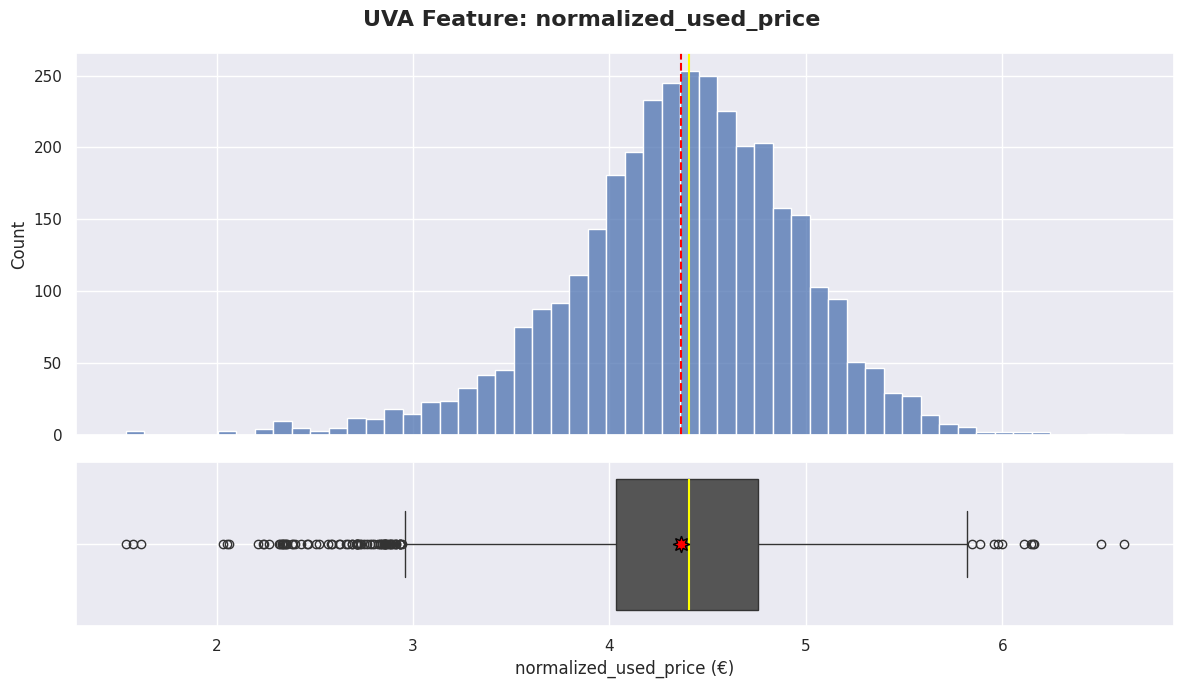

In [208]:
# normalized_used_price
histogram_boxplot(data, 'normalized_used_price', units='€')

*Question 1: What does the distribution of normalized used device prices look like?*

- The used device prices appear normally distributed

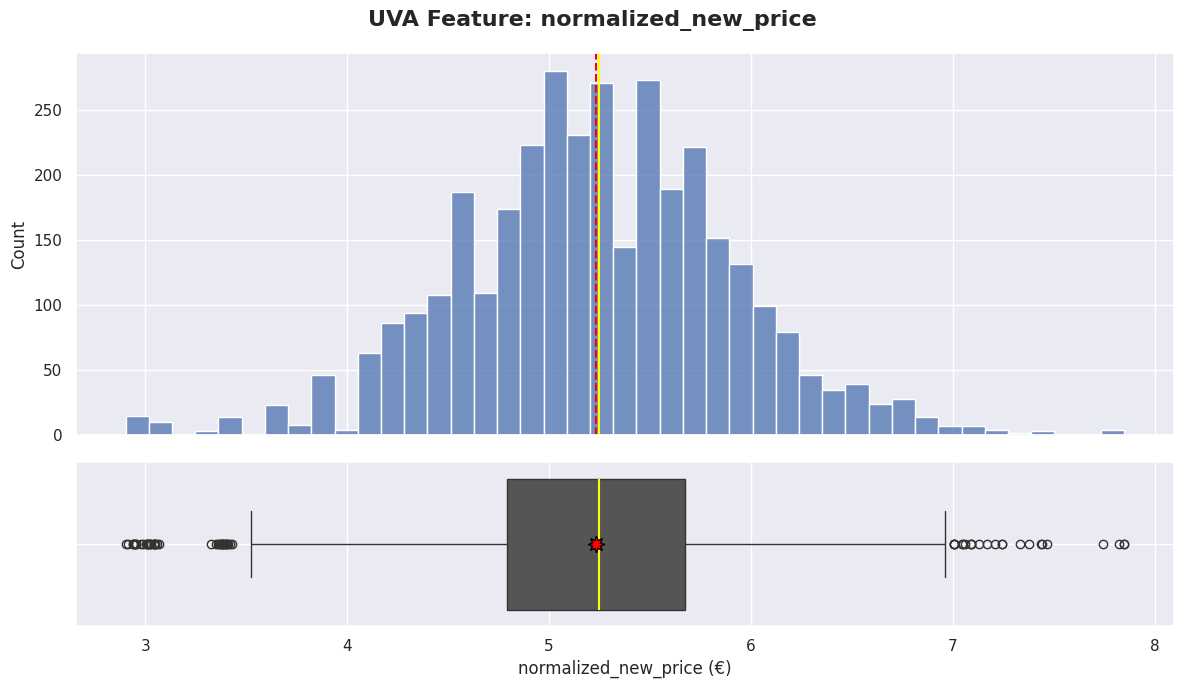

In [209]:
# normalized_new_price
histogram_boxplot(data, 'normalized_new_price', units='€')

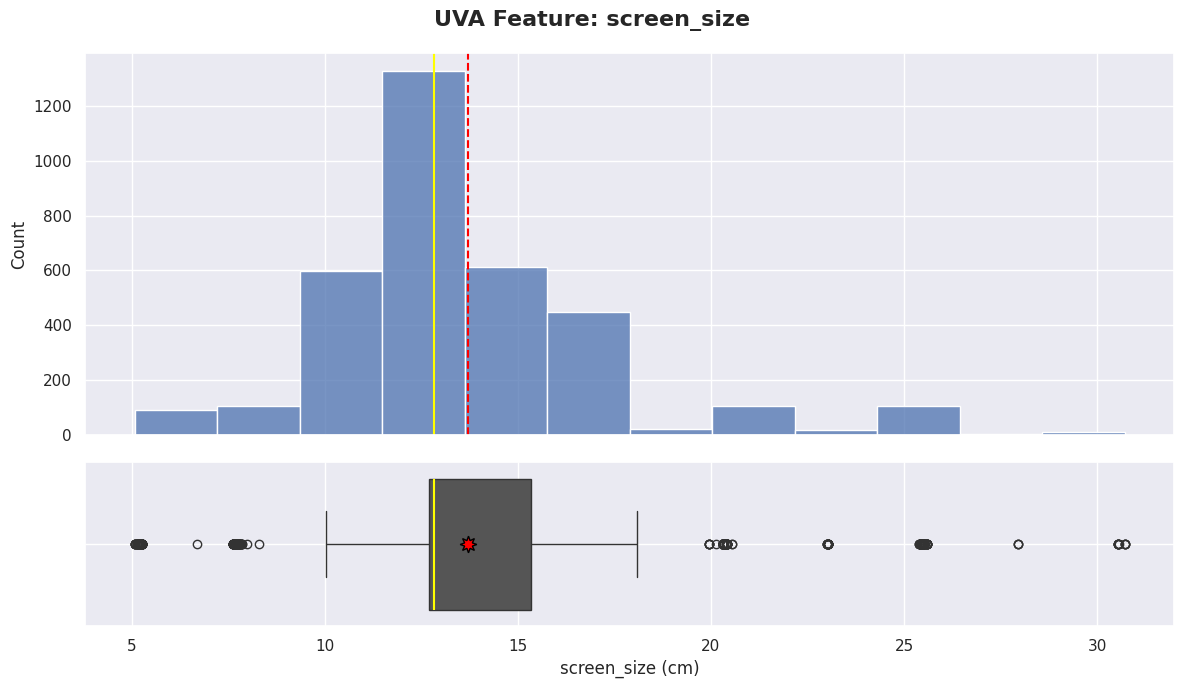

In [210]:
# screen_size
histogram_boxplot(data, 'screen_size', bins=12, units='cm')

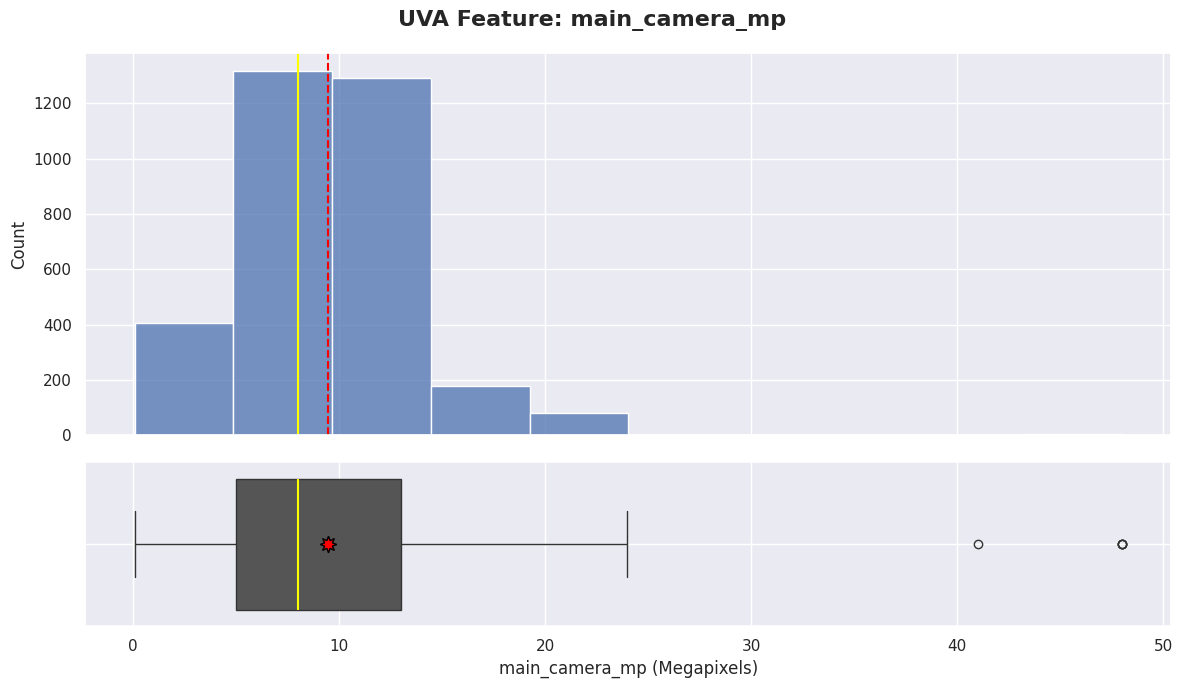

In [211]:
# main_camera_mp
histogram_boxplot(data, 'main_camera_mp', bins=10, units='Megapixels')

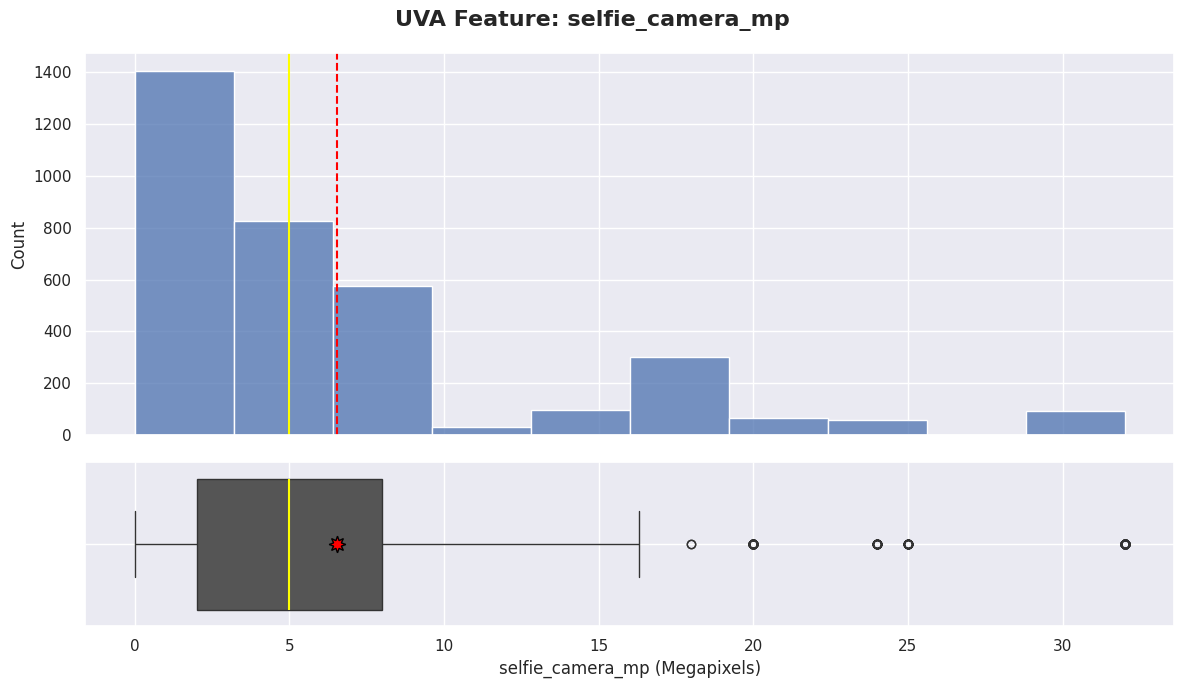

In [212]:
# selfie_camera_mp
histogram_boxplot(data, 'selfie_camera_mp', bins=10, units='Megapixels')

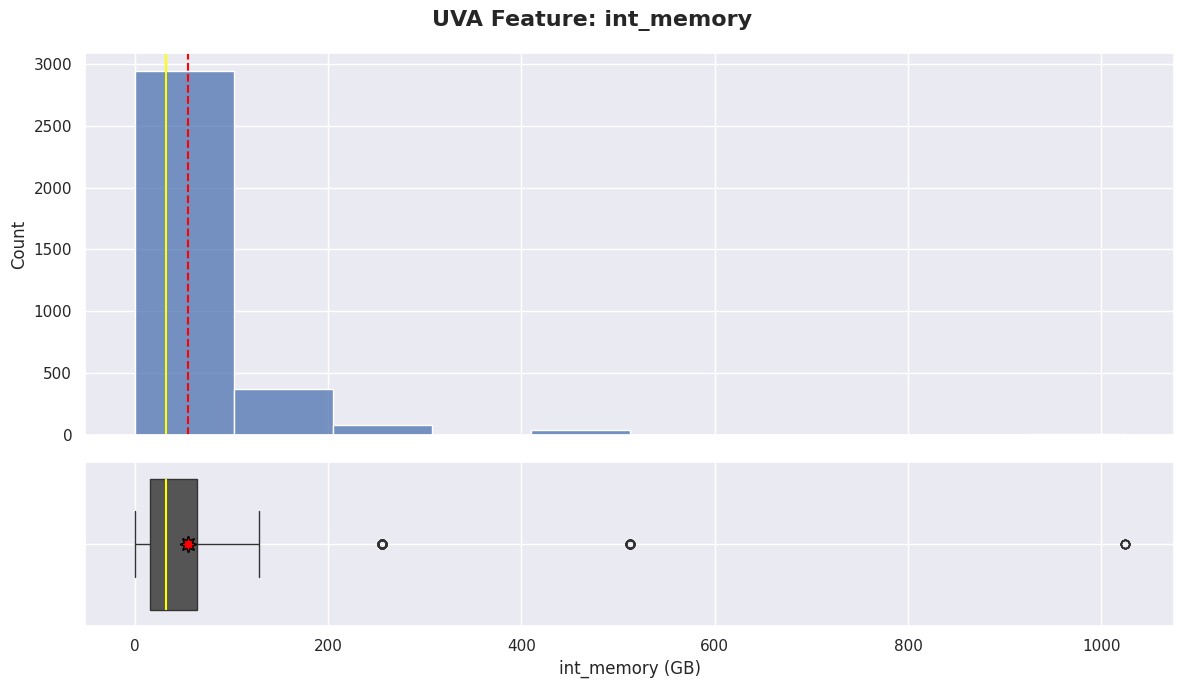

In [213]:
# int_memory
histogram_boxplot(data, 'int_memory', bins=10, units='GB')

Some of these outliers are pretty severe. Let's look closer at these > 1 TB internal memory devices to verify there are no errors in the dataset.

In [214]:
data[data["int_memory"] > 1000]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
644,Apple,iOS,30.71,yes,no,12.00,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.00,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
772,Asus,Android,12.70,no,no,8.00,0.3,1024.0,4.0,2500.0,160.0,2014,860,3.523120,4.594413
791,Asus,Android,10.34,no,no,13.00,1.2,1024.0,4.0,1820.0,126.0,2014,772,5.494953,5.555012
1468,Lava,Android,10.16,no,no,2.00,0.3,1024.0,4.0,1400.0,113.0,2013,595,2.978077,3.934958
1940,Micromax,Android,10.08,no,no,3.15,0.3,1024.0,4.0,1450.0,118.0,2013,836,3.437208,4.503912
2251,Others,Android,12.70,no,no,5.00,0.3,1024.0,4.0,2200.0,170.0,2013,584,4.070905,5.135798
2355,Samsung,Android,15.34,yes,no,12.00,9.0,1024.0,4.0,4100.0,175.0,2019,291,5.569718,6.957269


A quick Google search of some of the above devices verify that models with > 1 TB of internal storage do, in fact, exist. We can accept these statistical outliers as valid data points.

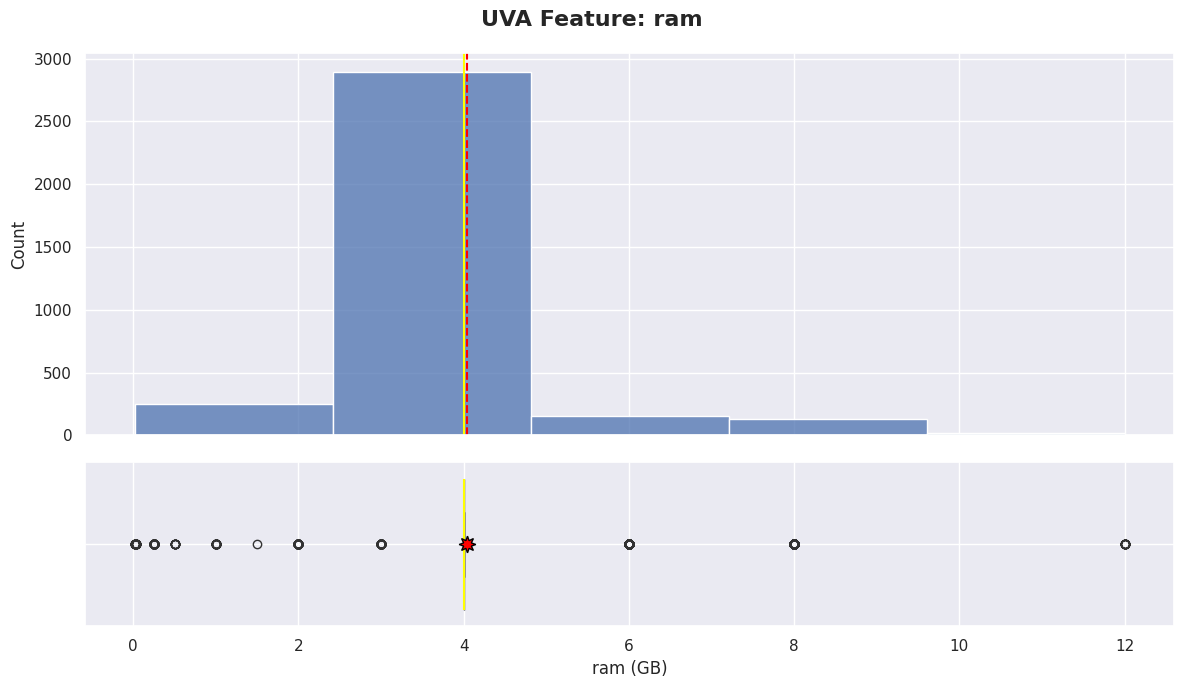

In [215]:
# ram
histogram_boxplot(data, 'ram', bins=5, units='GB')

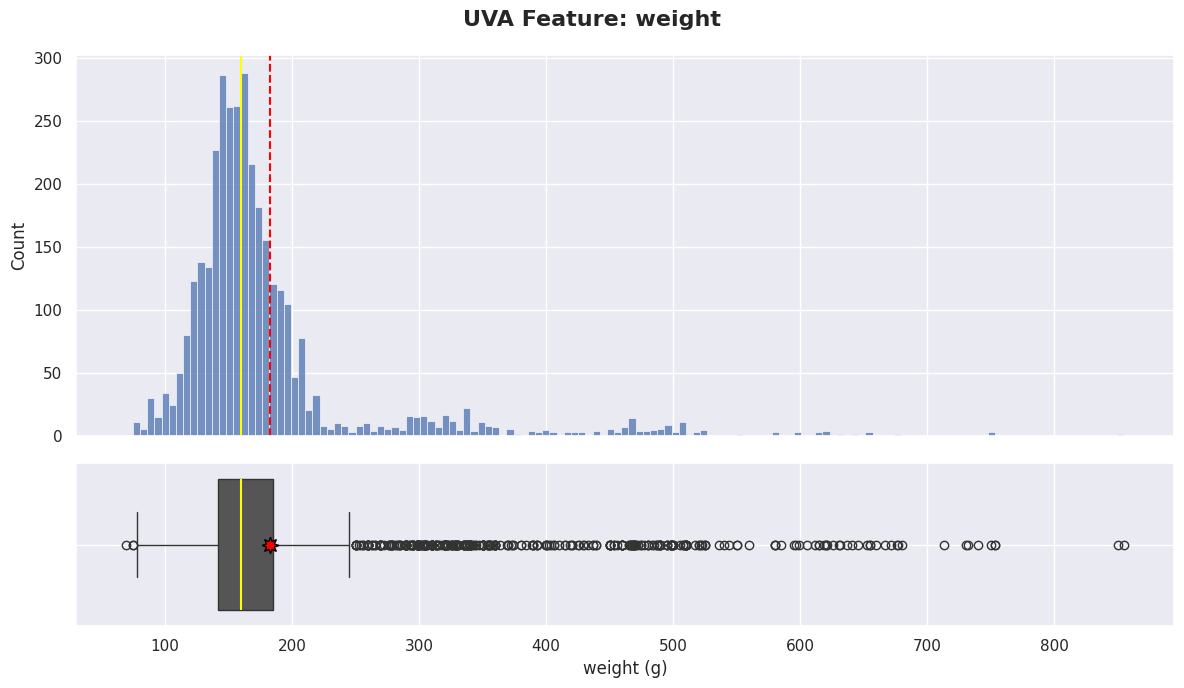

In [216]:
# weight
histogram_boxplot(data, 'weight', units='g')

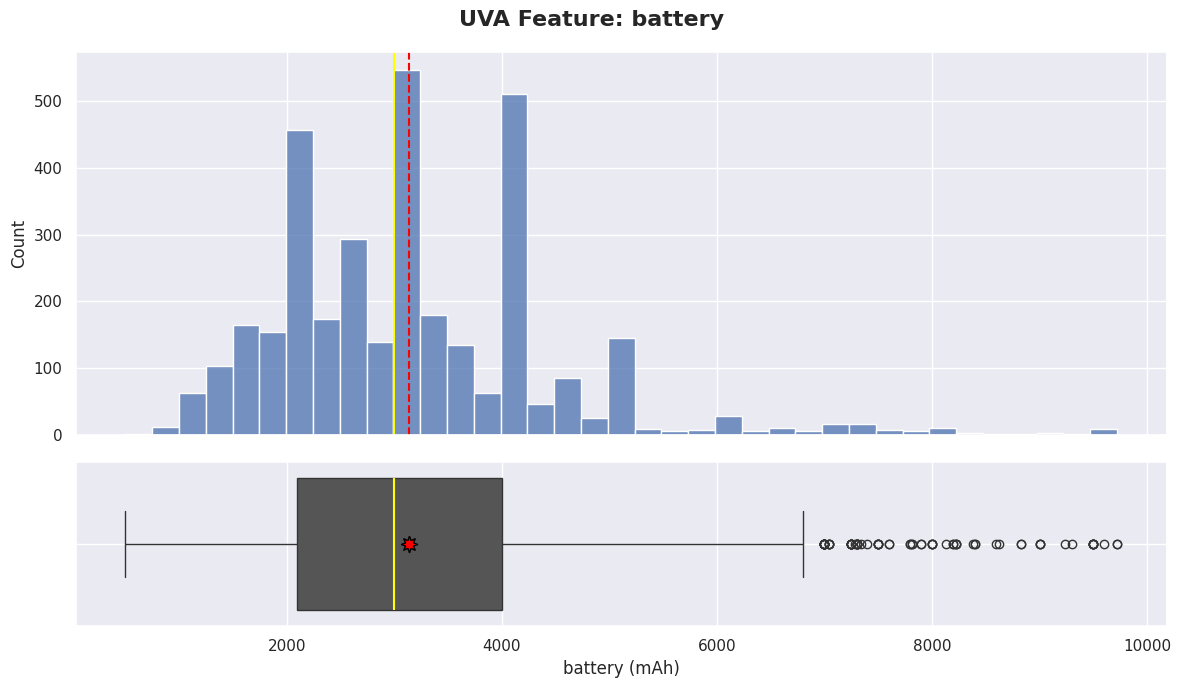

In [217]:
# battery
histogram_boxplot(data, 'battery', units='mAh')

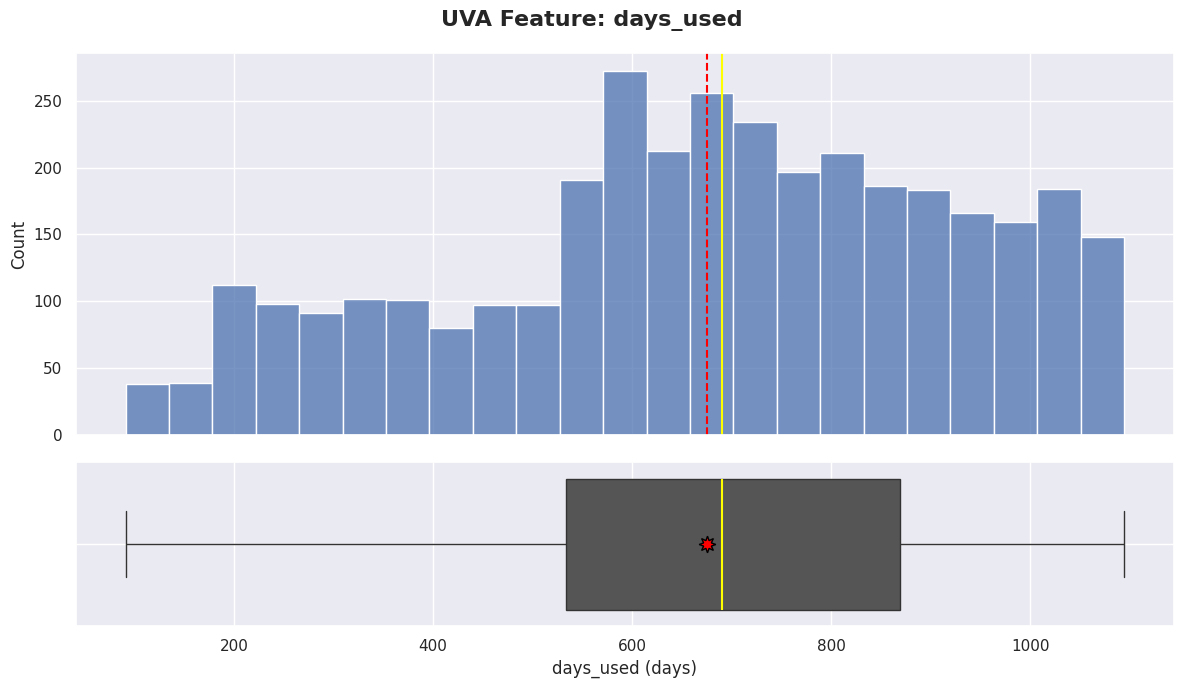

In [218]:
# days_used
histogram_boxplot(data, 'days_used', units='days')

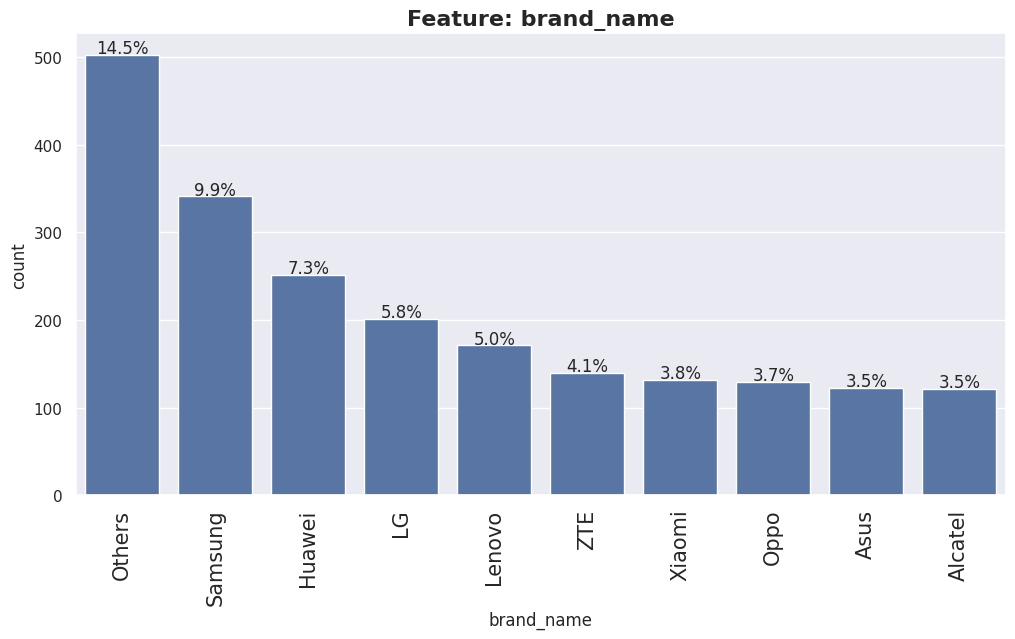

In [219]:
# brand_name
labeled_barplot(data, 'brand_name', limit=10)

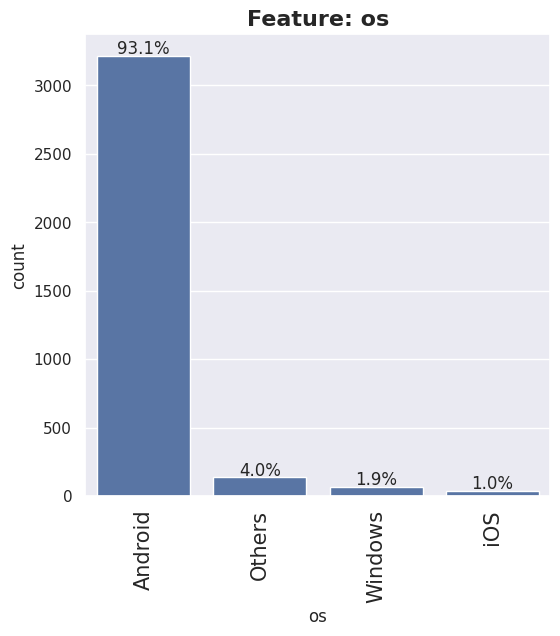

In [220]:
# os
labeled_barplot(data, 'os')

*Question 2: What percentage of the used device market is dominated by Android devices?*

- Approximately 93% of the market is dominated by Android devices

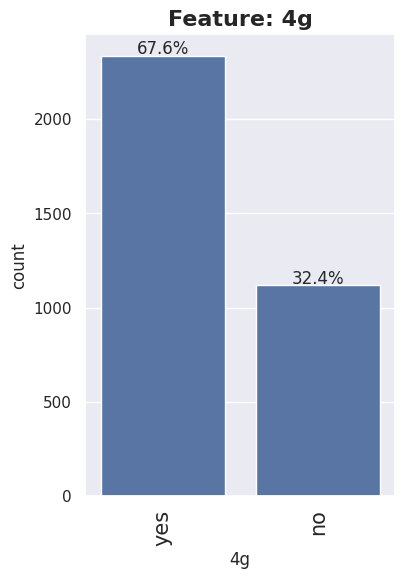

In [221]:
# 4g
labeled_barplot(data, '4g')

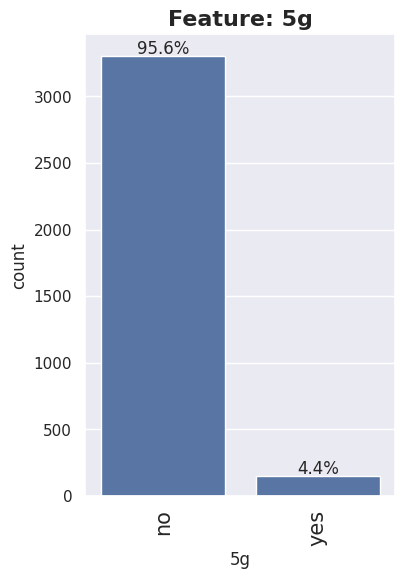

In [222]:
# 5g
labeled_barplot(data, '5g')

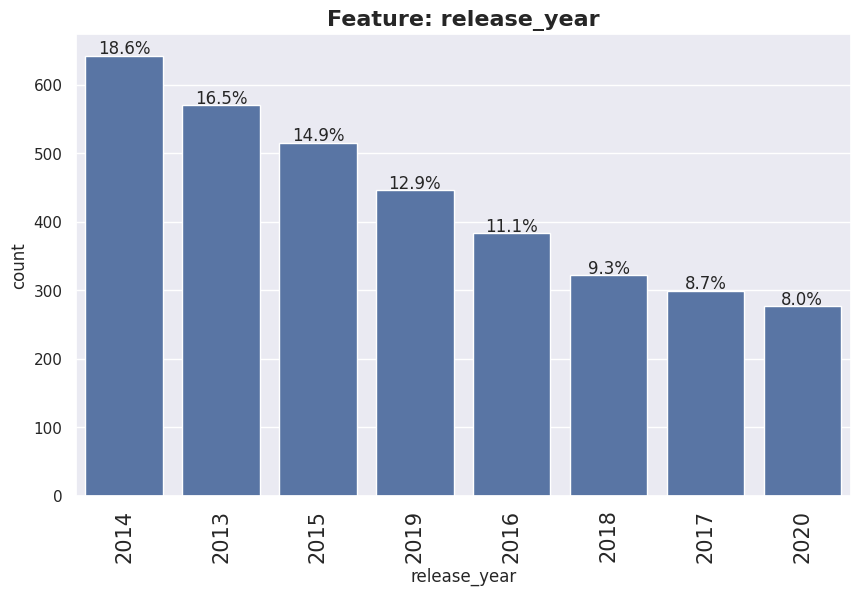

In [223]:
# release_year
labeled_barplot(data, 'release_year')

### Bivariate Analysis

RAM vs. Brand

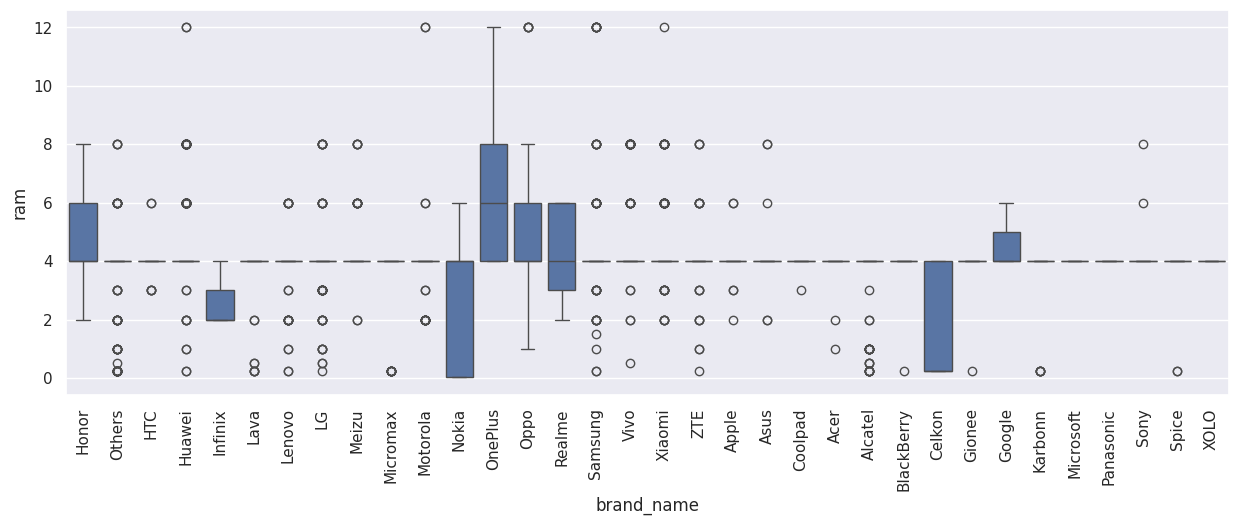

In [224]:
# ram vs brand
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [225]:
# Compute the statistical breakdown
data.groupby("brand_name")["ram"].mean().describe()

count    34.000000
mean      3.962049
std       0.787467
min       1.613636
25%       3.790803
50%       4.000000
75%       4.198341
max       6.363636
Name: ram, dtype: float64

*Question 3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?*

- The average RAM is relatively constant across brands (approx 4 GB)

Device Weight in High-Capacity Batteries

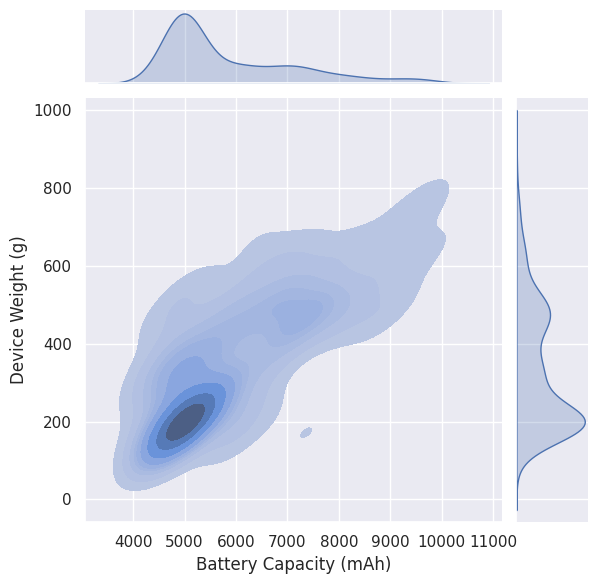

In [226]:
# Jointplot between battery and weight
sns.jointplot(data=data[data["battery"] > 4500], x="battery", y="weight", kind='kde', fill=True)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Device Weight (g)')
plt.show()

*Question 4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?*

- Device weight and battery life are strongly positively correlated
- For devices with a capacity greater than 4500 mAh, the distributions of device weights is right-skewed

Large Screen Brands

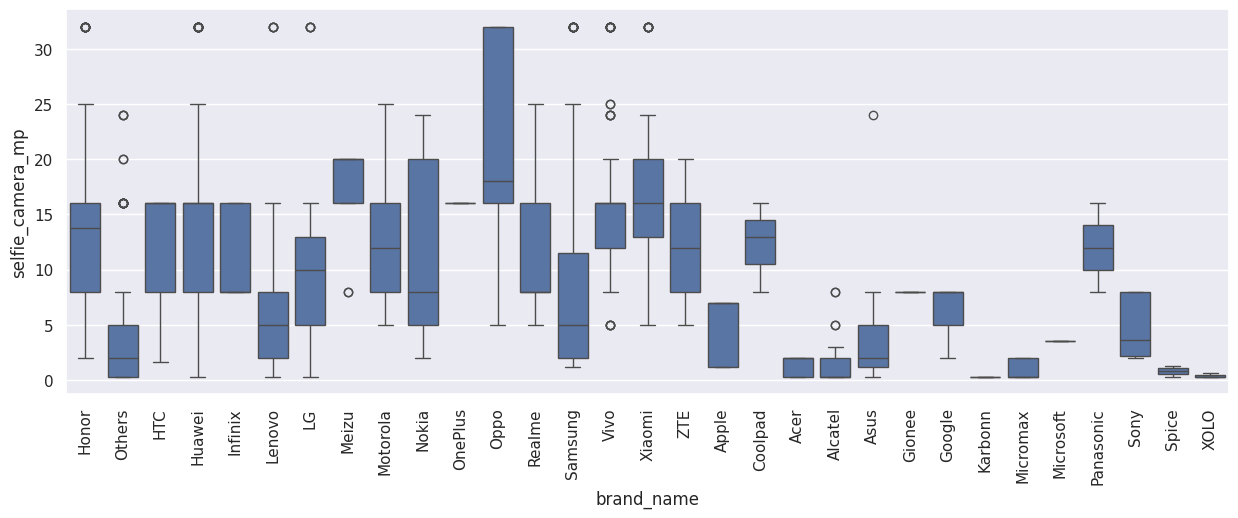

In [227]:
df_large_screens = data[data["screen_size"] > 6 * 2.54]
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_screens, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

In [228]:
# Compute the actual value of models with screens > 6" over brand
large_screen_stats = df_large_screens.groupby("brand_name")["screen_size"].describe()
large_screen_stats.sort_values(by="count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Huawei,149.0,17.854631,3.218334,15.27,15.620,16.590,17.8300,25.60
Samsung,119.0,19.439580,4.573457,15.27,15.340,17.780,23.0400,30.53
Others,99.0,19.362727,3.399598,15.29,16.995,17.780,20.3200,30.56
Vivo,80.0,16.164750,0.494691,15.27,15.800,16.210,16.4700,17.50
Honor,72.0,16.849444,2.401933,15.32,15.470,16.230,16.7400,25.50
Oppo,70.0,15.671286,0.522799,15.27,15.340,15.370,16.1975,16.69
Xiaomi,69.0,16.590580,1.424882,15.27,15.800,16.360,16.9400,25.43
Lenovo,69.0,19.364783,3.756197,15.29,16.230,17.780,20.3200,25.43
LG,59.0,17.233729,3.259320,15.27,15.340,15.440,17.7800,25.43


*Question 5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?*

- The five brands that have the most devices with screens larger than 6" are:
    1.   Huawei: 149
    2.   Samsung: 119
    3.   Others: 99
    4.   Vivo: 80
    5.   Honor: 72








Selfie Cameras with above 8MP resolution

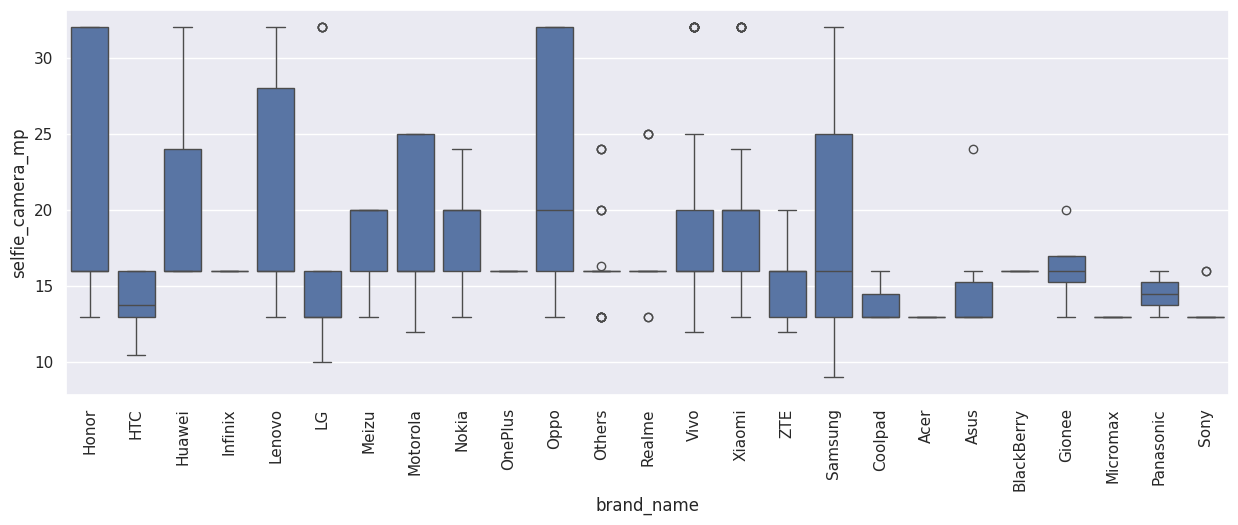

In [229]:
df_selfie_camera = data[data["selfie_camera_mp"] > 8]
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_selfie_camera, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

In [230]:
# Compute the statistical breakdown
df_selfie_camera.groupby("brand_name")["selfie_camera_mp"].mean().describe()

count    25.000000
mean     16.941851
std       2.628022
min      13.000000
25%      15.333333
50%      16.250000
75%      18.692308
max      22.120000
Name: selfie_camera_mp, dtype: float64

*Question 6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?*

- Twenty-five brands offer selfie cameras with > 8MP resolution
- The average MP value of high-resolution selfie cameras is about 17MP across brands

Correlation Check

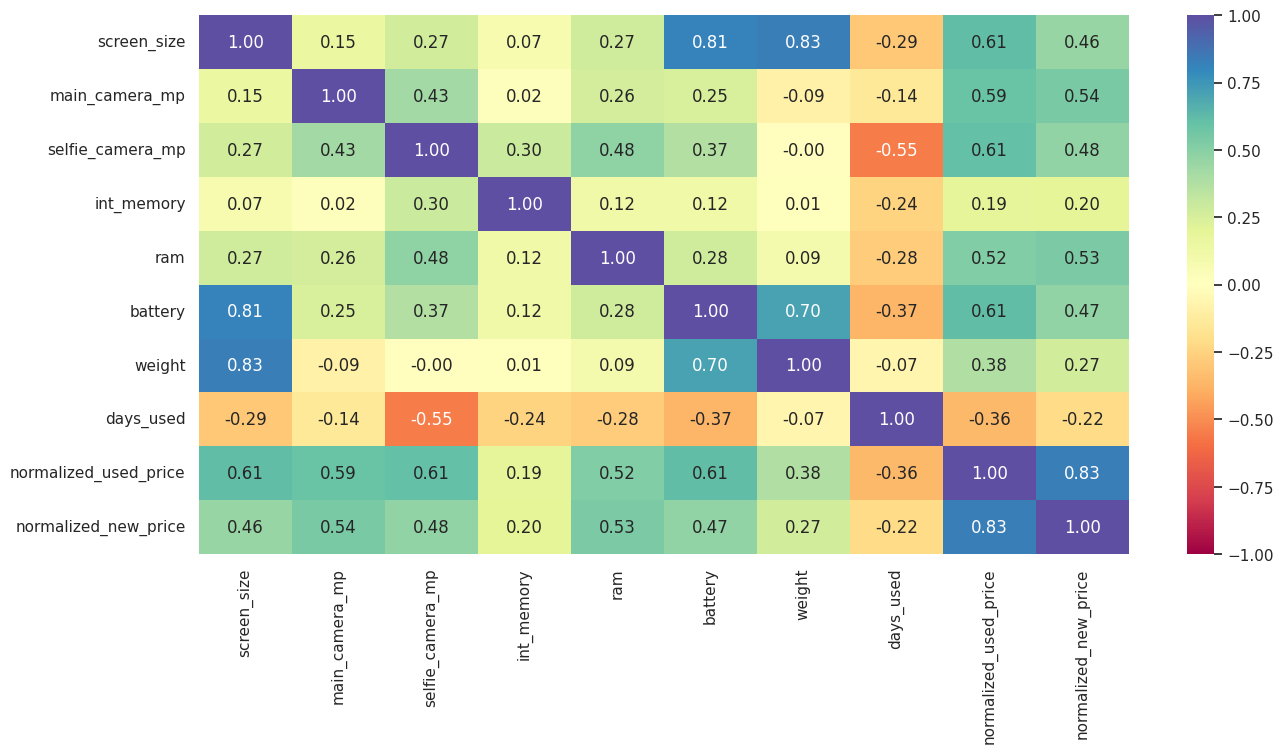

In [231]:
# Heatmap Correlation Matrix
corr_cols = data.select_dtypes(include=np.number).columns.tolist()
corr_cols.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*Question 7: Which attributes are highly correlated with the normalized price of a used device?*

- Strong Positive Correlations
  - normalized_new_price
- Mild Positive Correlations
  - main_camera_mp
  - ram
  - selfie_camera_mp
  - screen_size
  - battery

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [232]:
# Create a copy of the dataset
df = data.copy()

### Missing Value Treatment

In [233]:
def find_missing_values(df: pd.DataFrame, print_to_screen=True) -> None:
  """
  This function scans a dataframe for null-type values. It returns a list of
  tuples containing the column name and the number of null-type values in the
  Series.
  """
  null_cols = []
  missing_values = bool(df.isnull().sum().sum())
  if not missing_values:
    if print_to_screen:
      print(' NO MISSING VALUE SOURCES '.center(45, '-'))
  else:
    if print_to_screen:
      print(' MISSING VALUE SOURCES '.center(45, '-'))
    null_counts = df.isnull().sum()
    for col_name, null_count in null_counts.items():
        if null_count > 0:
          null_cols.append((col_name, null_count))
          if print_to_screen:
            print(f'{col_name.rjust(17)} ..... {null_count:3} missing values')

  return null_cols

In [234]:
# Determine which columns have missing values
null_cols = find_missing_values(df)

----------- MISSING VALUE SOURCES -----------
   main_camera_mp ..... 179 missing values
 selfie_camera_mp .....   2 missing values
       int_memory .....   4 missing values
              ram .....   4 missing values
          battery .....   6 missing values
           weight .....   7 missing values


In [235]:
# Suppress numpy warning due to NaN-resulting mathematical operation
import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')

# Impute the missing data with the median value of each column. We can improve
# the accuracy of our imputation by assuming the techincal specifications are
# going to be similar for devices of the same brand and release year.
grouped_df = df.groupby(['brand_name', 'release_year'])
for col, _ in null_cols:
  df[col].fillna(value=grouped_df[col].transform('median'), inplace=True)

# Verify we imputed all missing values
null_cols = find_missing_values(df)

----------- MISSING VALUE SOURCES -----------
   main_camera_mp ..... 179 missing values
 selfie_camera_mp .....   2 missing values
          battery .....   6 missing values
           weight .....   7 missing values


In [236]:
# We see that not all of the columns containing missing data were imputed with
# the group median. This is due to the fact that there are 0 non-null values
# associated with some of the brand_name/release_year groups.

# From our EDA, we can argue that battery life, weight, and Mega-Pixel
# resolution of smart phones are similar year-over-year due to technological
# advances. Therefore, any remaining missing values will be imputed as the
# median value of each release_year group.
grouped_df = df.groupby('release_year')
for col, _ in null_cols:
  df[col].fillna(value=grouped_df[col].transform('median'), inplace=True)

# Verify we imputed all missing values
null_cols = find_missing_values(df)

---------- NO MISSING VALUE SOURCES ---------


We have successfully imputed all missing values in the dataset with appropriate estimations.

### Feature Engineering

In [237]:
# Let's replace the release_year column with a new column called device_age. We
# will use the data-collection year of 2021 as our baseline
df['device_age'] = 2021 - df['release_year']
df.drop(columns=['release_year'], inplace=True)

# Display a statistical summary of the new feature
df['device_age'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: device_age, dtype: float64

In [238]:
# Let's replace the "Yes" and "No" responses in the 4g and 5g columns with True
# and False, respectively.
df['4g'].replace({'yes': True, 'no': False}, inplace=True)
df['5g'].replace({'yes': True, 'no': False}, inplace=True)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,device_age
0,Honor,Android,14.50,True,False,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,True,True,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,True,True,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,True,True,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,True,False,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Detection

From our univariate analysis, we can see that most of the features in our dataset contain outliers. However, none of these outliers appear erroneous. All outliers in the dataset represent valid data points and, thus, will be included in our modeling moving forward.

### Data Preparation for Modeling

In [239]:
# Create Dummy Variables
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,14.50,True,False,13.0,5.0,64.0,3.0,3020.0,146.0,127,...,False,False,False,False,False,False,False,False,False,False
1,17.30,True,True,13.0,16.0,128.0,8.0,4300.0,213.0,325,...,False,False,False,False,False,False,False,False,False,False
2,16.69,True,True,13.0,8.0,128.0,8.0,4200.0,213.0,162,...,False,False,False,False,False,False,False,False,False,False
3,25.50,True,True,13.0,8.0,64.0,6.0,7250.0,480.0,345,...,False,False,False,False,False,False,False,False,False,False
4,15.32,True,False,13.0,8.0,64.0,3.0,5000.0,185.0,293,...,False,False,False,False,False,False,False,False,False,False


In [240]:
# Defining X and y variables
X = df.drop(columns=['normalized_used_price'])
y = df['normalized_used_price']

In [241]:
# Adding the intercept
X = sm.add_constant(X)

In [242]:
# Global float conversion
X = X.astype(float)
X.head()

,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,1.0,14.50,1.0,0.0,13.0,5.0,64.0,3.0,3020.0,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,17.30,1.0,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,16.69,1.0,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,25.50,1.0,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.32,1.0,0.0,13.0,8.0,64.0,3.0,5000.0,185.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
# Splitting the training/testing dataset (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [244]:
# Fit the OLS model
ols_model = sm.OLS(y_train, x_train).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           02:26:18   Log-Likelihood:                 121.44
No. Observations:                   2417   AIC:                            -144.9
Df Residuals:                       2368   BIC:                             138.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [245]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [246]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model_train_perf = model_performance_regression(ols_model, x_train, y_train)
ols_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230114,0.180569,0.844576,0.841358,4.332517


In [247]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model_test_perf = model_performance_regression(ols_model, x_test, y_test)
ols_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238923,0.184918,0.841732,0.833875,4.506499


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Custom Functions

In [248]:
def optimize_vif(training_x, training_y, base_ar2, vif_threshold, ar2_threshold):

  # Create a white list container to track features with VIF, but also high impact
  white_list = []

  # Take an initial measurement of the VIF for each feature in the training set
  vif_series = pd.Series([variance_inflation_factor(training_x.astype(float).values, i) for i in range(training_x.shape[1])], index=training_x.columns)

  # Use a while loop to automate VIF optimatization
  print()
  print(" Measuring VIF Scores ".center(80, "-"))
  while True:

    # Remove the "const" feature VIF, as it is irrelavent
    vif_series.drop("const", inplace=True)

    # Build a list of the high-VIF feature names that have not been white-listed
    high_vif_features = vif_series[vif_series > vif_threshold].index.tolist()
    high_vif_features = [x for x in high_vif_features if x not in white_list]

    # If no more valid high-VIF features exist, break out of the loop
    if not high_vif_features:
      print()
      print(f" Maximum VIF of remaining features < {vif_threshold} ".center(80, "-"))
      if white_list:
        # Notify user of white-listed features, if they exist
        print("(*) White-listed features:")
        for feature in white_list:
          print(f"    > {feature}")

      return training_x

    # Otherwise, notify the user that high-VIF features exist and need handling
    else:
      print(f"\n(!) {len(high_vif_features)} features detected in the dataset with VIF > {vif_threshold}")

    # Create a container to store all the adj-R² deltas
    ar2_diffs = []

    # For each high-VIF feature, measure the change in adj-R² when removed from the model
    print(f"    > Test removing high VIF features", end=" ... ")
    for high_vif_feature in high_vif_features:
      temp_train = training_x.drop(columns=high_vif_feature, axis=1)
      temp_model = sm.OLS(training_y, temp_train.astype(float)).fit()
      ar2_diff = abs(temp_model.rsquared_adj - base_ar2)
      ar2_diffs.append((high_vif_feature, ar2_diff))
    print("Done")

    # Target the feature that made the lowest change in adj-R² after dropping from the model
    min_ar2_diff = min(ar2_diffs, key=lambda x: x[1])

    # If the change in adj-R² was relatively insignificant, remove it from the training set
    if min_ar2_diff[1] < ar2_threshold:
      print(f"    > Presence of {min_ar2_diff[0]} deemed most insignificant")
      print(f"    > ΔR²-adj: {min_ar2_diff[1]:.5f}")
      print(f"    > Dropping {min_ar2_diff[0]} from the training set", end=" ... ")
      training_x.drop([min_ar2_diff[0]], axis=1, inplace=True)
      print("Done")

    # If the change in adj-R² was significant, add the feature to the white-list (don't drop)
    else:
      print(f"    > High VIF feature {min_ar2_diff[0]} deemed significant")
      print(f"    > ΔR²-adj: {min_ar2_diff[1]:.5f}")
      print(f"    > Adding to white list", end=" ... ")
      white_list.append(min_ar2_diff[0])
      print("Done")

    # Re-measure the VIF for all features in the (possibly) altered training set
    print(f"    > Remeasuring VIF scores", end=" ... ")
    vif_series = pd.Series([variance_inflation_factor(training_x.astype(float).values, i) for i in range(training_x.shape[1])], index=training_x.columns)
    print("Done")

def optimize_p_values(input_model, training_x, training_y):
  # Define the maximum allowable P-Value
  max_p_value = 0.05

  # Grab the P-Values from the model
  p_values = input_model.pvalues

  # In a loop, drop high-value P-Values one at a time until all remaining are significant
  print()
  print(" Measuring P-Values ".center(80, "-"))
  while any(p > max_p_value for p in p_values):

    # Drop the highest P-Value
    least_sig_feature = (p_values.idxmax(), p_values.max())
    print(f"\n(!) Dropping feature: {least_sig_feature[0]} (p-val: {least_sig_feature[1]:.5f})")
    training_x.drop(least_sig_feature[0], axis=1, inplace=True)

    # Re-train the model with updated features
    print("    > Re-training the model", end=" ... ")
    output_model = sm.OLS(training_y, training_x).fit()
    print("Done")

    # Re-compute the P-Values of the remaining features
    print("    > Re-computing P-Values", end=" ... ")
    p_values = output_model.pvalues
    print("Done")

  # Notify the user that the loop finished
  print()
  print(f" Maximum P-Value of remaining features < {max_p_value} ".center(80, "-"))
  return output_model

### (1) Test for Multicollinearity

#### Variance Inflation Factor

In [249]:
# Define the maximum allowable VIF in our features
max_vif = 5

# Define the maximum allowable change in adj-R² after drop
max_ar2_diff = 0.01

# Optimize the VIF of the training set
x_train = optimize_vif(
    training_x=x_train,
    training_y=y_train,
    base_ar2=ols_model.rsquared_adj,
    vif_threshold=max_vif,
    ar2_threshold=max_ar2_diff
    )


----------------------------- Measuring VIF Scores -----------------------------

(!) 7 features detected in the dataset with VIF > 5
    > Test removing high VIF features ... Done
    > Presence of brand_name_Samsung deemed most insignificant
    > ΔR²-adj: 0.00003
    > Dropping brand_name_Samsung from the training set ... Done
    > Remeasuring VIF scores ... Done

(!) 4 features detected in the dataset with VIF > 5
    > Test removing high VIF features ... Done
    > Presence of os_iOS deemed most insignificant
    > ΔR²-adj: 0.00009
    > Dropping os_iOS from the training set ... Done
    > Remeasuring VIF scores ... Done

(!) 2 features detected in the dataset with VIF > 5
    > Test removing high VIF features ... Done
    > Presence of screen_size deemed most insignificant
    > ΔR²-adj: 0.00337
    > Dropping screen_size from the training set ... Done
    > Remeasuring VIF scores ... Done

-------------------- Maximum VIF of remaining features < 5 ---------------------


#### Significance Check (P-Values)

In [250]:
# Drop statistically insignificant features from the model
ols_model = optimize_p_values(
    input_model=ols_model,
    training_x=x_train,
    training_y=y_train,
    )


------------------------------ Measuring P-Values ------------------------------

(!) Dropping feature: brand_name_ZTE (p-val: 0.94181)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_LG (p-val: 0.94953)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_Spice (p-val: 0.91124)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_HTC (p-val: 0.84495)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_Others (p-val: 0.86895)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_Celkon (p-val: 0.73887)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: os_Windows (p-val: 0.73406)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Droppin

### (2 & 3) Test for Linearity & Independence

In [251]:
# Create a dataframe of residuals
df_pred = pd.DataFrame()
df_pred["actual_values"] = y_train.values
df_pred["fitted_values"] = ols_model.fittedvalues.values
df_pred["residuals"] = ols_model.resid.values
df_pred.head()

,actual_values,fitted_values,residuals
0,4.087488,3.860613,0.226875
1,4.448399,4.639109,-0.190710
2,4.315353,4.279925,0.035428
3,4.282068,4.227981,0.054087
4,4.456438,4.488290,-0.031852


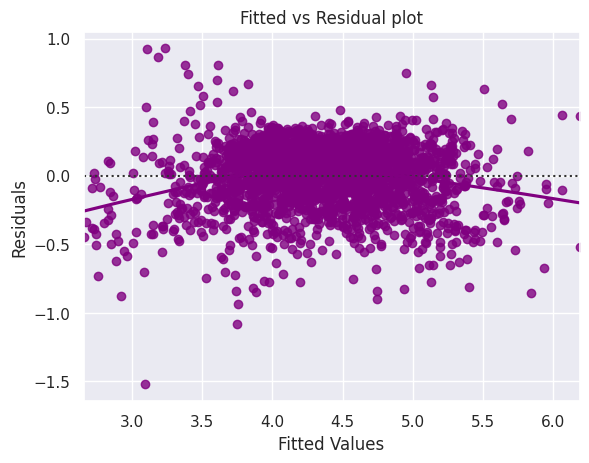

In [252]:
# Plot the residuals
sns.residplot(data=df_pred, x="fitted_values", y="residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- Non-linearity is observed in the residuals
- We can improve the accuracy of our model by applying a transformation to one or more of our model's features
- First, let's investigate the relationship between our model's presently included features and our dependent variable

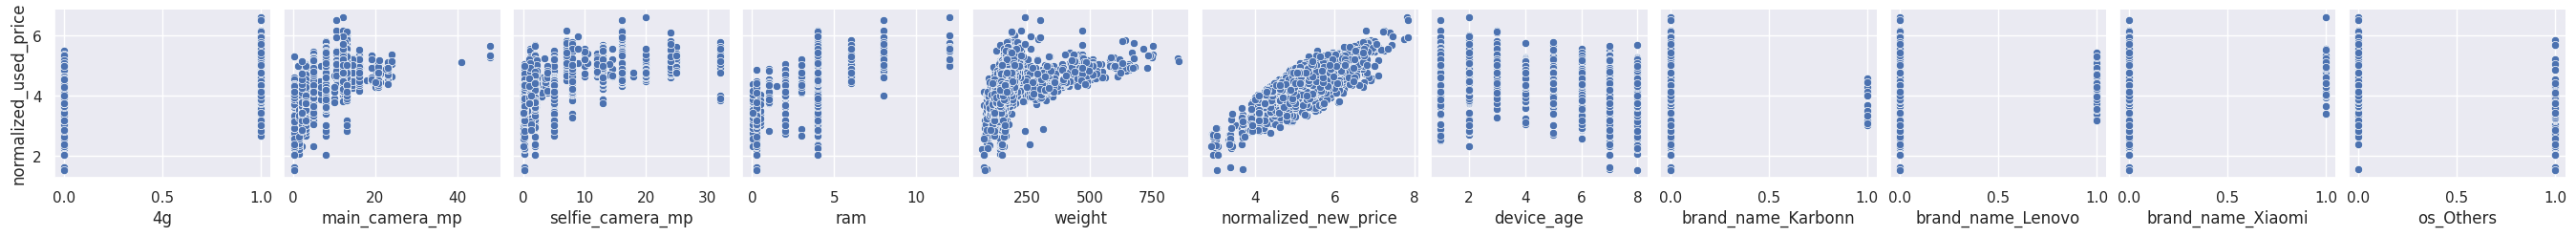

In [253]:
# Use a pairplot to visualy determine the source of our non-linearity
pp_cols = x_train.columns.to_list()
pp_cols.remove("const")
sns.pairplot(data=df, y_vars=["normalized_used_price"], x_vars=pp_cols)
plt.show()

Suspected non-linear relationships:
- main_camera_mp
- selfie_camera_mp
- weight

In [254]:
for nl_feature in ["weight", "main_camera_mp", "selfie_camera_mp"]:
  x_train[f"{nl_feature}_sq"] = np.square(x_train[nl_feature])
  x_test[f"{nl_feature}_sq"] = np.square(x_test[nl_feature])

ols_model = sm.OLS(y_train, x_train).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     928.2
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           02:26:30   Log-Likelihood:                 116.92
No. Observations:                   2417   AIC:                            -203.8
Df Residuals:                       2402   BIC:                            -117.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [255]:
# Drop statistically insignificant features from the recomputed model after
# adding non-linear feature transforms
ols_model = optimize_p_values(
    input_model=ols_model,
    training_x=x_train,
    training_y=y_train,
    )


------------------------------ Measuring P-Values ------------------------------

(!) Dropping feature: 4g (p-val: 0.08197)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

(!) Dropping feature: brand_name_Lenovo (p-val: 0.05026)
    > Re-training the model ... Done
    > Re-computing P-Values ... Done

----------------- Maximum P-Value of remaining features < 0.05 -----------------


In [256]:
# Create a new dataframe of residuals
df_pred = pd.DataFrame()
df_pred["actual_values"] = y_train.values
df_pred["fitted_values"] = ols_model.fittedvalues.values
df_pred["residuals"] = ols_model.resid.values
df_pred.head()

,actual_values,fitted_values,residuals
0,4.087488,3.854421,0.233067
1,4.448399,4.640716,-0.192317
2,4.315353,4.347319,-0.031967
3,4.282068,4.222388,0.059681
4,4.456438,4.529077,-0.072639


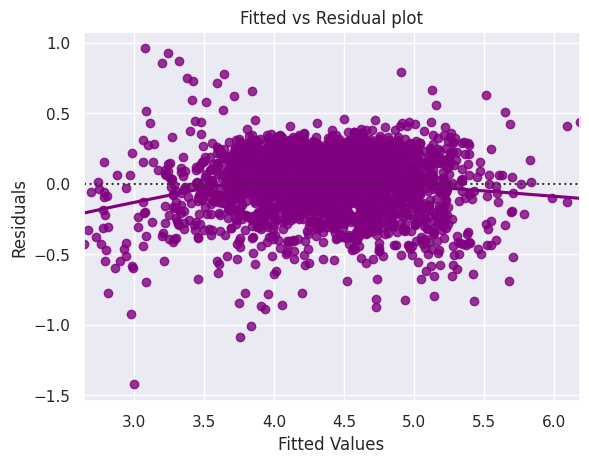

In [257]:
# Plot the residuals
sns.residplot(data=df_pred, x="fitted_values", y="residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Re-computing the model with added feature transformations slightly flattened the residual curve, as desired. Thus, we will preserve the transformations in our final model.

### (4) Test for Normality

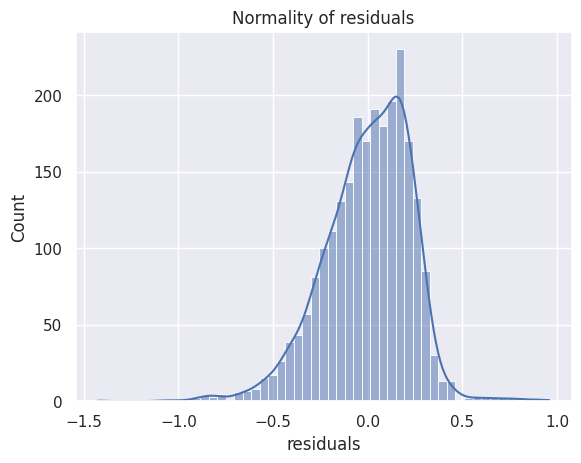

In [258]:
# Basic histogram
sns.histplot(df_pred["residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Visually, the distribution of the residuals looks roughly normal

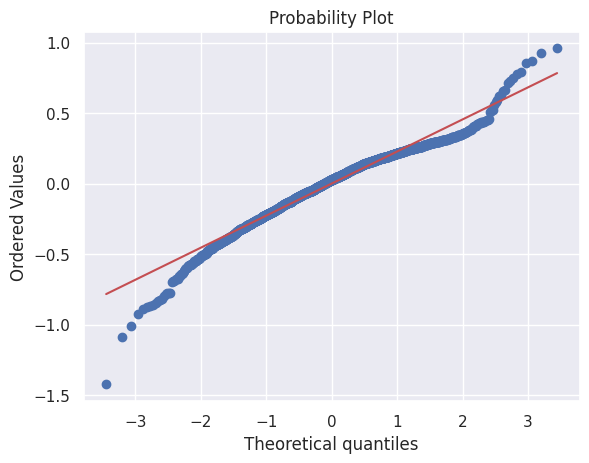

In [259]:
# Q-Q Plot for Normality
stats.probplot(df_pred["residuals"], dist="norm", plot=pylab)
plt.show()

In [260]:
# Shapiro-Wilkes test for normality
stats.shapiro(df_pred["residuals"])

ShapiroResult(statistic=0.9686470627784729, pvalue=1.4842011510594967e-22)

- Since our P-Value is less than 0.05, the residuals are technically not normal.
- However, as an approximation, we might be willing to accept this distribution as close to being normal

### (5) Test for Homoscedasticity

In [261]:
# Goldfeldquandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["residuals"], x_train.astype(float))
lzip(name, test)

[('F statistic', 1.045619726224831), ('p-value', 0.22034439855295093)]

Our P-Value is greater than 0.05, thus we can claim that our residuals are homoscedastic.

## Final Model

In [262]:
# Fit the OLS model
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     1080.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           02:26:32   Log-Likelihood:                 113.47
No. Observations:                   2417   AIC:                            -200.9
Df Residuals:                       2404   BIC:                            -125.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [263]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model_train_perf = model_performance_regression(ols_model, x_train, y_train)
ols_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230874,0.180164,0.843547,0.842701,4.329872


In [264]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
for col in x_test.columns:
  if col not in x_train.columns:
    x_test.drop(col, axis=1, inplace=True)
ols_model_test_perf = model_performance_regression(ols_model, x_test, y_test)
ols_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238541,0.184558,0.842238,0.840233,4.493334


## Actionable Insights and Recommendations



---



- Our model has an $R^2$ score of 0.844. This means it is able to explain 84.4% of teh variance in the data, which is quite good. This also implies the model is not under-fitted
- Our RMSE for both test and training sets and comparable. This indicates that our model is not over-fitted.
- The MAE score indicates that our model is able to predict the normalized_used_price of a device within 0.185 units on the test data set.
- Overall, we can conclude that our model is good for both prediction and inference purposes